In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_classification
import numpy as np

Importo il dataset

In [2]:
dl = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\student-por.csv")

In questo passaggio visualizzo il dataset

In [3]:
pd.set_option('display.max_columns', None)
dl.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


Verifico se ci sono valori nulli e visualizzo qualche informazione riguardo il dataset

In [4]:
dl.isnull().values.any()

False

In [5]:
dl.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


L'intento di questo progetto è quello di vedere come può variare il voto finale dello studente in base alla situazione personale e sociale.
Per farlo divido il progetto in tre parti:
1. **Nella prima parte visualizzo graficamente le variabii del dataset (Visualizzando se ci sono più femmine o maschi, la distribuzione dell'età, lo stato di convivenza dei genitori, il livello di istruzione della madre e del padre, la distribuzione del tempo libero, il consumo di alcol giornalmente e il consumo di alcol nel weekend**
2. **Nella seconda parte analizzo e visualizzo le variabili che influenzano maggiormente il voto finale (Visualiazzando l'influenza del genere nei voti, l'influenza dell'età nei voti, l'influenza dello stato di convivenza dei genitori, l'influenza del tempo studiato nei voti, l'influenza del fallimento nei voti, l'influenza del consumo di alcol giornalmente nei voti e il consumo di alcol nel weekend nei voti**
3. **Nella terza parte cerco di prevedere il voto finale in base alla situazione sociale e personale(Per farlo i modelli che utilizzerò saranno SVR,RandomForest e DecisionTree. Come metrica di valutazione utilizzerò r squared**

# 1. Visualizzo graficamente le variabili del dataset

In questo passaggio possiamo vedere come nel dataset ci siano più femmine che maschi

In [6]:
dl["sex"].value_counts()

F    383
M    266
Name: sex, dtype: int64

Attraverso questo dataset si può notare come ci sia una distrubuzione di età maggiore compresa tra i 16 anni e i 18

Text(0.5, 1.0, "distribuzione dell'età")

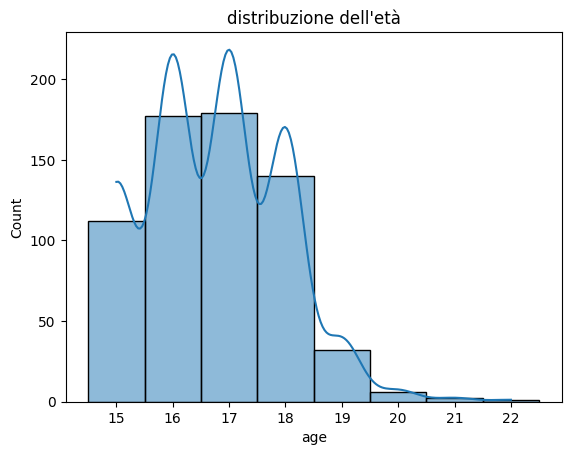

In [7]:
sns.histplot(dl.age,kde=True, bins=8, discrete=True)
plt.title("distribuzione dell'età")

Qui possiamo vedere graficamente il fatto che ci siano più femmine che maschi

Text(0.5, 1.0, 'numero di femmine e numero di maschi')

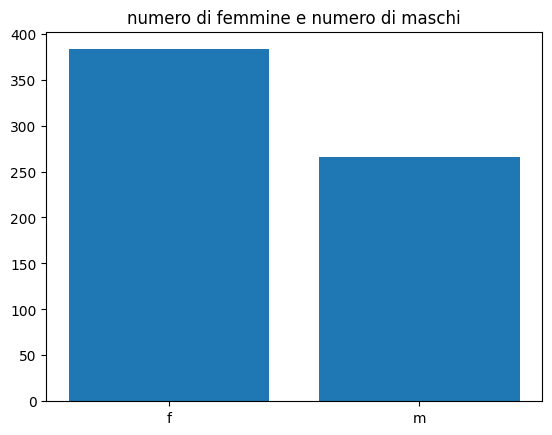

In [8]:
valori = 383,266
sex = "f","m"
plt.bar(sex,height=valori)
plt.title("numero di femmine e numero di maschi")

In questo grafico si può vedere come gli studenti con i genitori conviventi sia molto superiore rispetto ai studenti con i genitori separati

C:\Users\edoar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'stato di convivenza dei genitori')

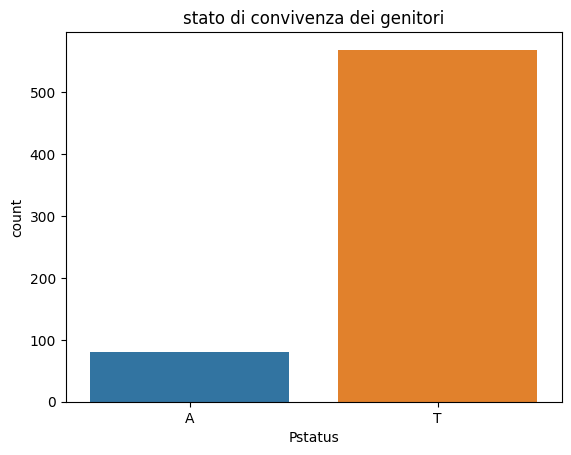

In [9]:
sns.countplot(dl["Pstatus"])
plt.title("stato di convivenza dei genitori")

Con questo grafico si può vedere quali siano i livelli più frequenti di istruzione della madre

C:\Users\edoar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Conteggio livelli di istruzione della madre')

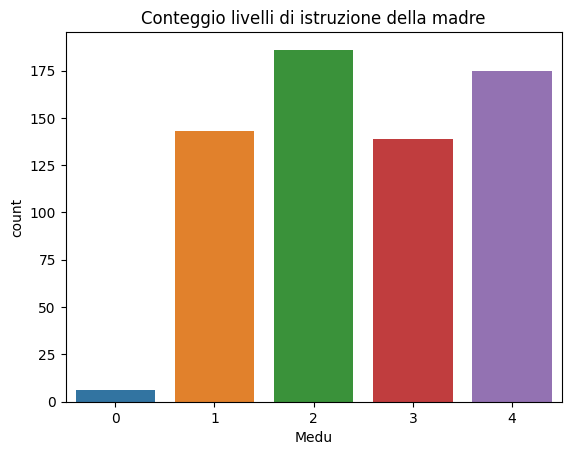

In [10]:
sns.countplot(dl["Medu"])
plt.title("Conteggio livelli di istruzione della madre")

In questo passaggio possiamo vedere i livelli più frequenti di istruzione del padre

C:\Users\edoar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Conteggio livelli di istruzione del padre')

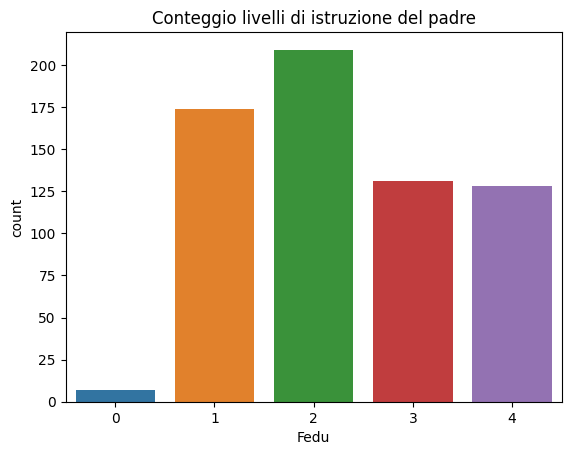

In [11]:
sns.countplot(dl["Fedu"])
plt.title("Conteggio livelli di istruzione del padre")

Con questo grafico possiamo notare come la distribuzione del tempo libero

C:\Users\edoar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribuzione in base al tempo libero')

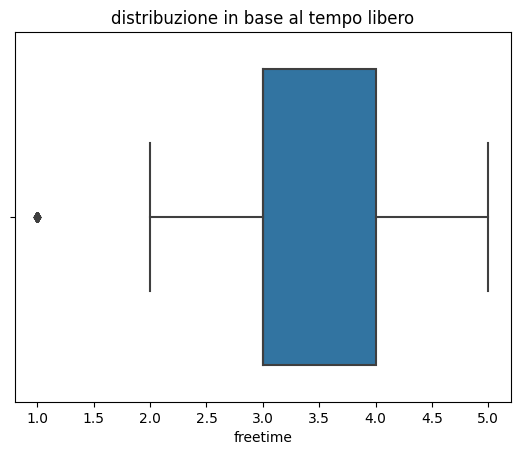

In [12]:
sns.boxplot(dl["freetime"]) 
plt.title("distribuzione in base al tempo libero")

Con questo grafico si può notare la distribuzione del consumo di alcol giornalmente

Text(0.5, 1.0, 'distribuzione del consumo di alcol giornalmente')

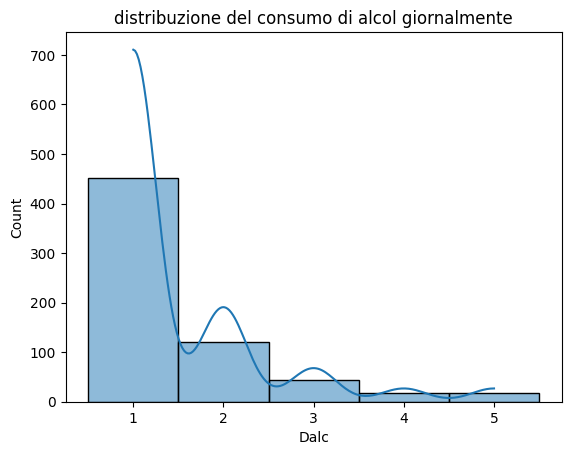

In [13]:
sns.histplot(dl["Dalc"], discrete=True,kde=True)
plt.title("distribuzione del consumo di alcol giornalmente")

Qui invece si può notare la distribuzione del consumo di alcol nel weekend

Text(0.5, 1.0, 'distribuzione del consumo di alcol nel weekend')

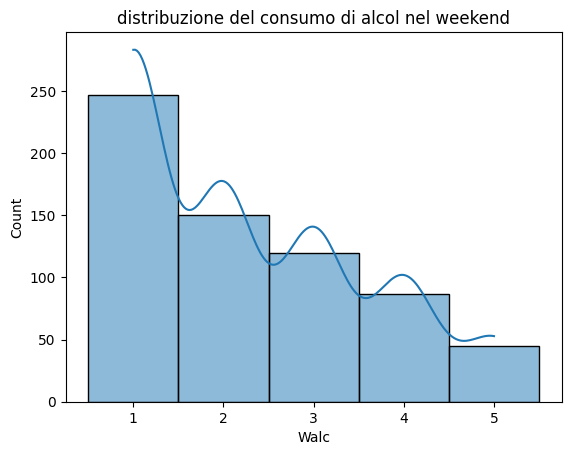

In [14]:
sns.histplot(dl["Walc"], discrete=True,kde=True)
plt.title("distribuzione del consumo di alcol nel weekend")

In questo grafico possiamo vedere come la distribuzione dei voti G1 sia maggiore nei livelli compresi tra 10 e 12.5

Text(0.5, 1.0, 'distribuzione dei voti G1')

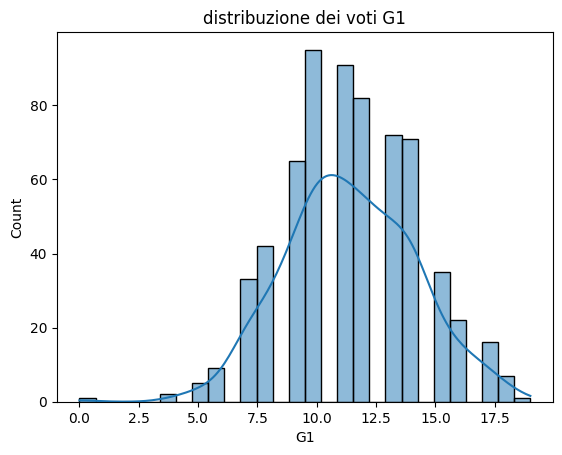

In [15]:
sns.histplot(dl["G1"],kde=True)
plt.title("distribuzione dei voti G1")

In questo grafico possiamo vedere la distribuzione dei voti G2

Text(0.5, 1.0, 'distribuzione dei voti G2')

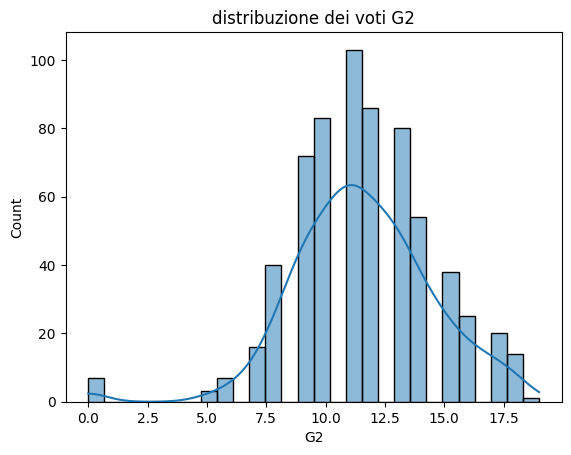

In [16]:
sns.histplot(dl["G2"],kde=True)
plt.title("distribuzione dei voti G2")

In questo grafico si può notare la distribuzione dei voti G3

Text(0.5, 1.0, 'distribuzione dei voti G3')

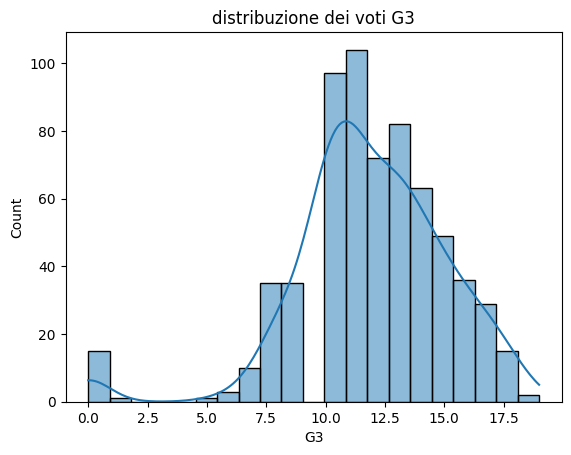

In [17]:
sns.histplot(dl["G3"],kde=True)
plt.title("distribuzione dei voti G3")

---

# 2. Visualizzio le variabili che influenzano maggiormente il voto finale

Attraverso questo grafico si può vedere quali variabii influenzano maggiormente i voti

<AxesSubplot:>

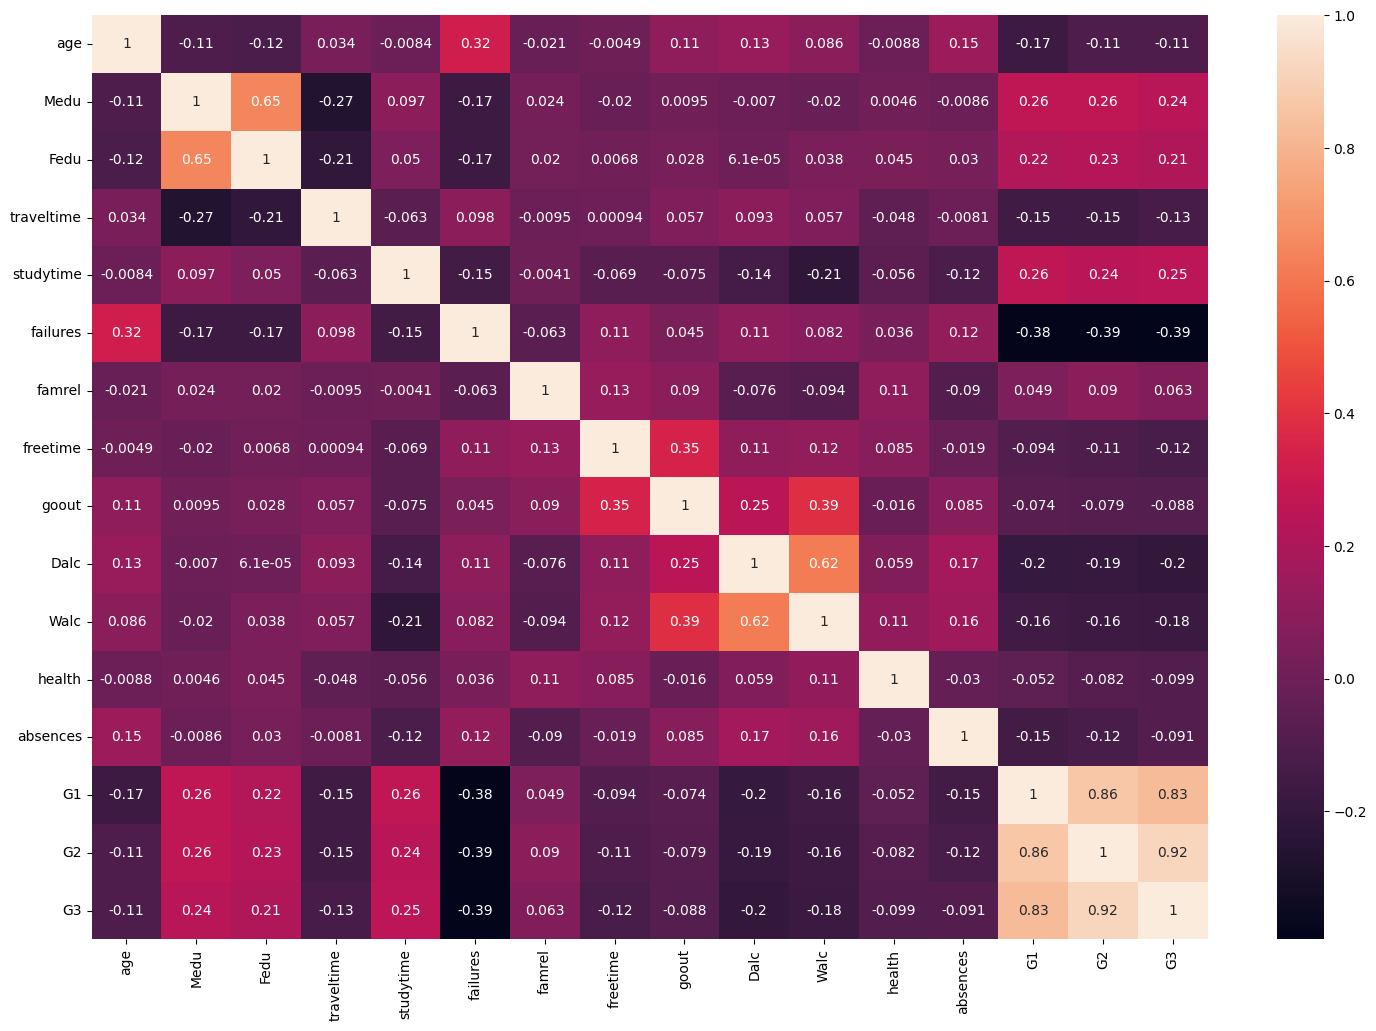

In [18]:
plt.figure(figsize=(18, 12))
sns.heatmap(dl.corr(),annot=True)

Qui si può notare come il tipo di genere ingluenzi i voti finali

Text(0.5, 1.0, 'influenza del genere nei voti G3')

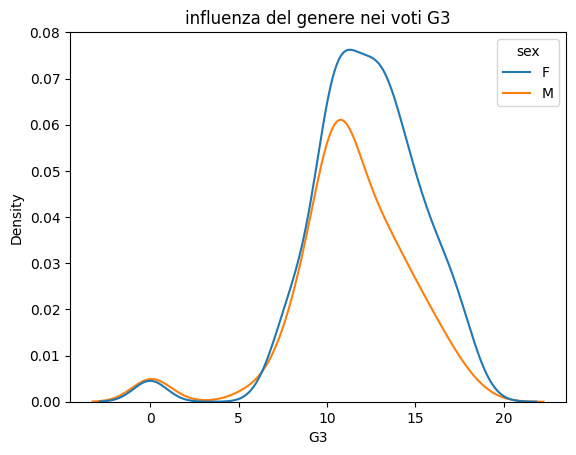

In [19]:
sns.kdeplot(data=dl, x="G3", hue="sex")
plt.title("influenza del genere nei voti G3")

In questo grafico possiamo notare come l'età influenzi i voti finali

Text(0.5, 1.0, "influenza dell'età nei voti G3")

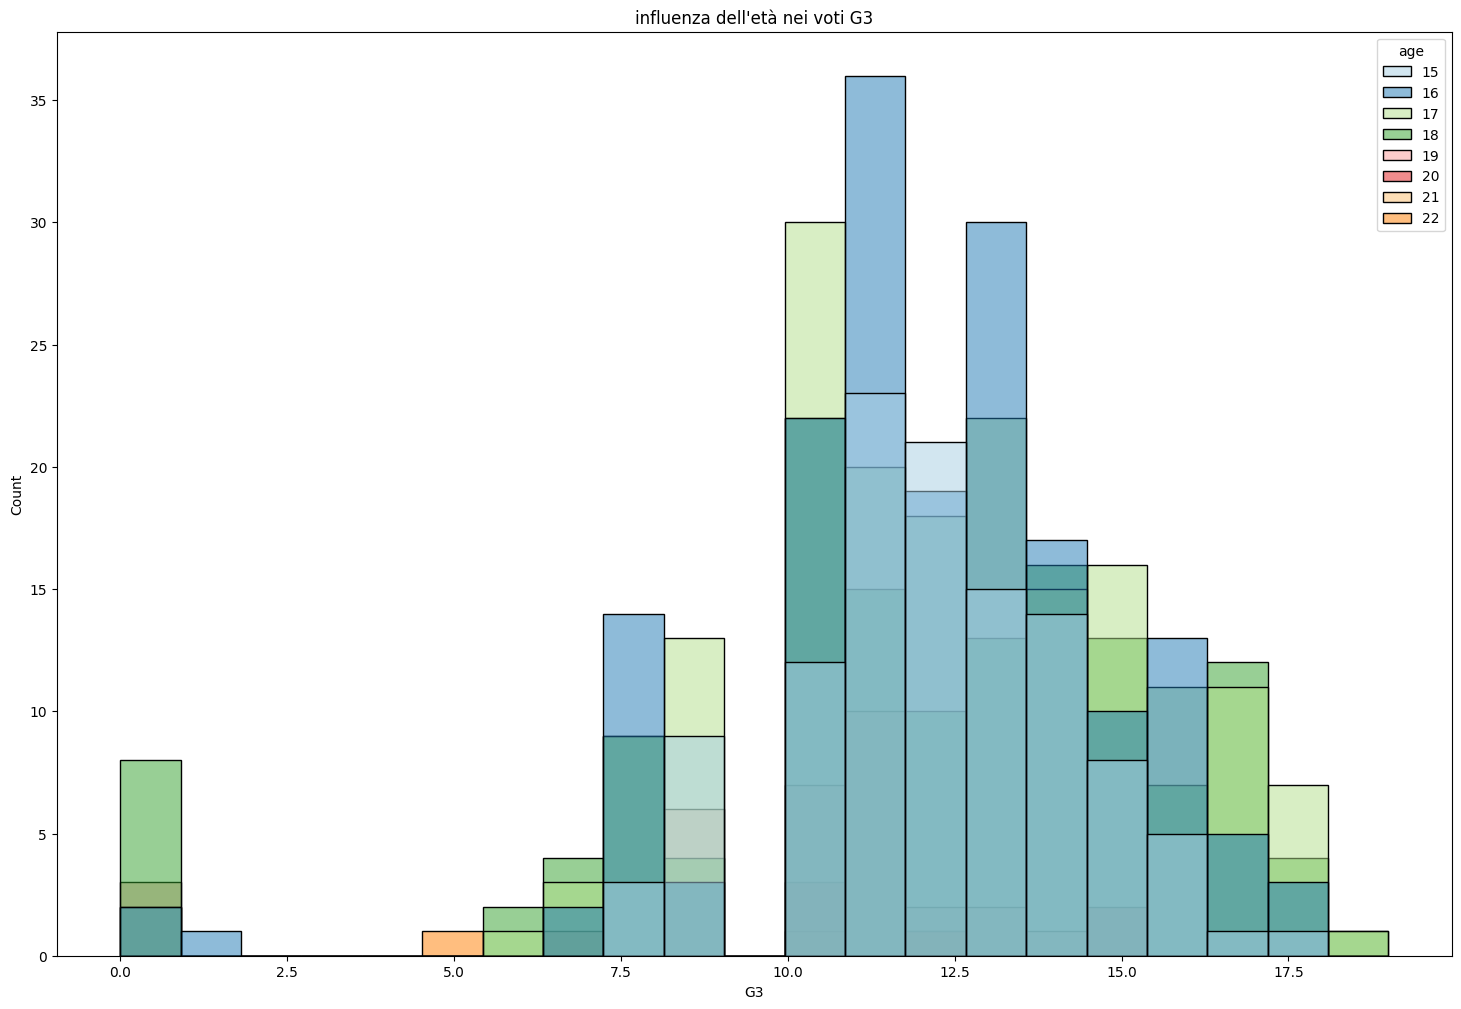

In [20]:
plt.figure(figsize=(18, 12))
sns.histplot(data=dl, x="G3", hue="age",palette="Paired")
plt.title("influenza dell'età nei voti G3")

Attraverso questo grafico possiamo notare come lo stato di convivenza dei genitori (T=convivente,A=separato) influenza il voto finale

Text(0.5, 1.0, 'influenza dello stato di convivenza dei genitori sui voti G3')

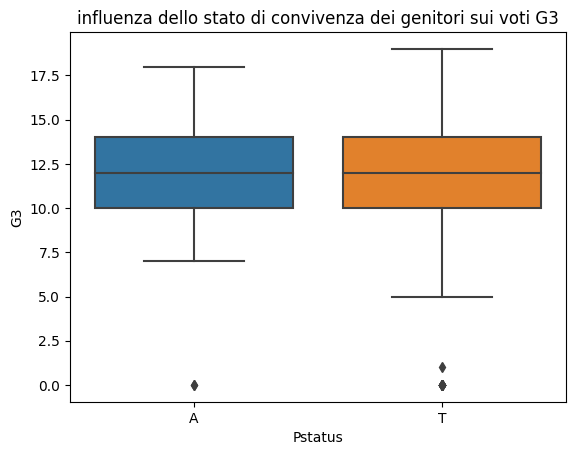

In [21]:
sns.boxplot(x="Pstatus", y="G3", data=dl)
plt.title("influenza dello stato di convivenza dei genitori sui voti G3")

In [22]:
cor = dl.corr()
medu = cor['Medu']['G3']
fedu = cor['Fedu']['G3']

In questo grafico possiamo vedere che il livello di istruzione della madre influenza maggiormente del livello di istruzione del padre nel voto finale dello studente

Text(0.5, 1.0, 'livelli di correlazione voti G3 in base ai livelli di istruzione della madre e del padre')

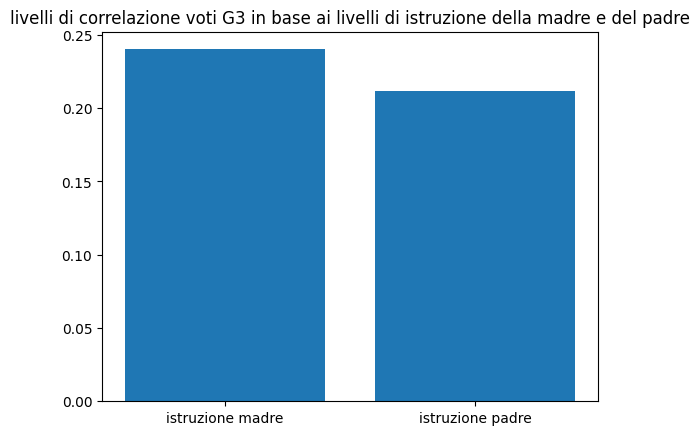

In [23]:
valori = 0.240150,0.211799
medufedu = "istruzione madre","istruzione padre"
plt.bar(medufedu,height=valori)
plt.title("livelli di correlazione voti G3 in base ai livelli di istruzione della madre e del padre")

Attraverso questo grafico possiamo vedere che con l'aumentare del tempo studiato aumenti anche il voto finale

Text(0.5, 1.0, "aumento dei voti G3 con l'aumento del tempo studiato")

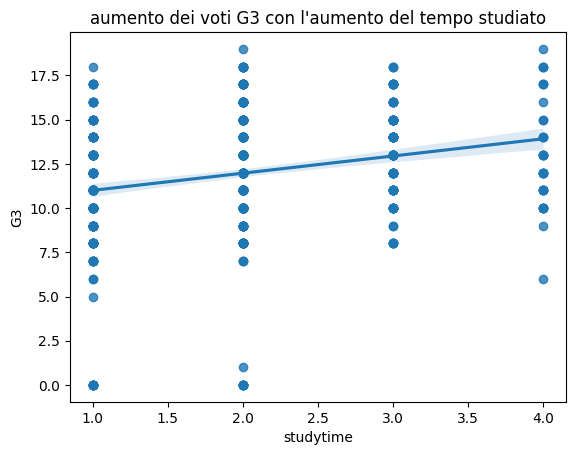

In [24]:
sns.regplot(x="studytime",y="G3",data=dl)
plt.title("aumento dei voti G3 con l'aumento del tempo studiato")

Qui si può notare che con l'aumentare dei fallimenti diminuisce il voto finale

Text(0.5, 1.0, "aumento dei voti G3 con l'aumento dei fallimenti")

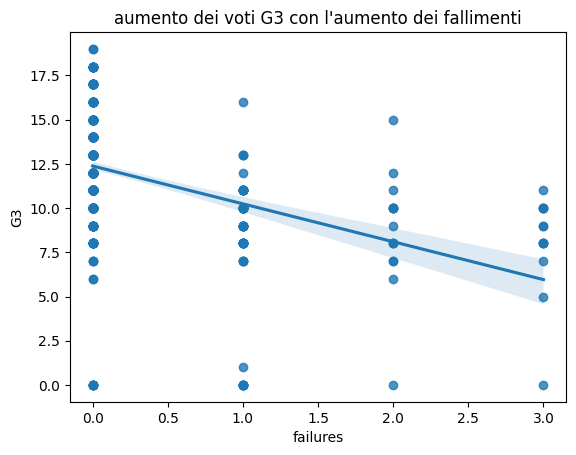

In [25]:
sns.regplot(x="failures",y="G3",data=dl)
plt.title("aumento dei voti G3 con l'aumento dei fallimenti")

Attraverso questo grafico si può vedere come varia il consumo di alcol giornalmente in base al genere

Text(0.5, 1.0, 'consumo di alcol giornalmente in base al genere')

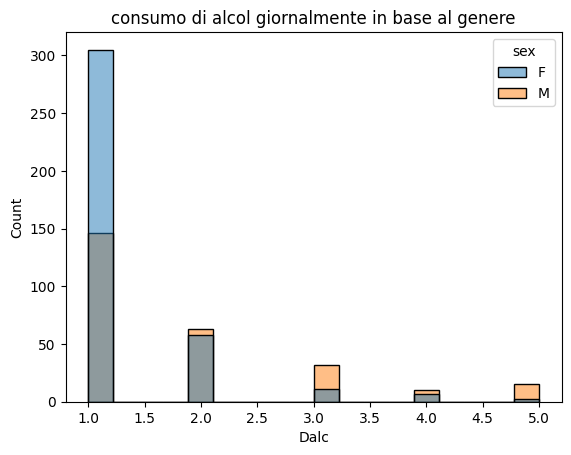

In [26]:
sns.histplot(data=dl, x="Dalc", hue="sex")
plt.title("consumo di alcol giornalmente in base al genere")

Qui invece vediamo come varia il consumo di alcol nel weekend in base al genere

Text(0.5, 1.0, 'consumo di alcol nel weekend in base al genere')

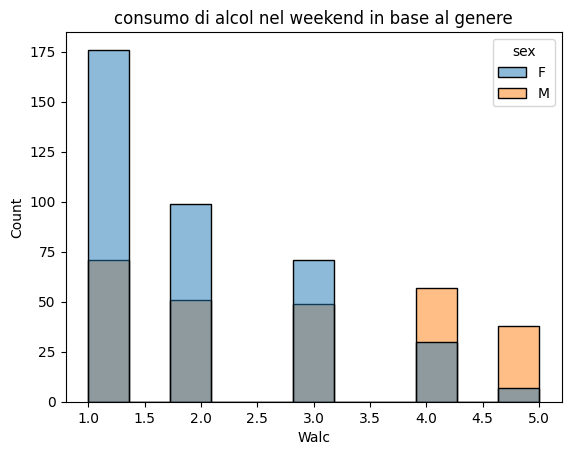

In [27]:
sns.histplot(data=dl, x="Walc", hue="sex")
plt.title("consumo di alcol nel weekend in base al genere")

In questo grafico vediamo come il consumo di alcol giornalmente influenzi i voti G1

Text(0.5, 1.0, 'rapporto tra voti G1 e consumo di alcol giornalmente')

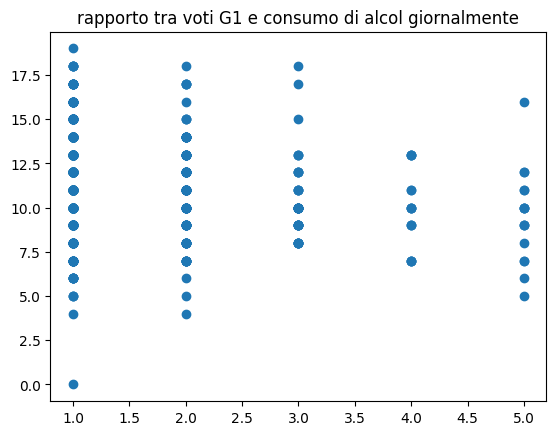

In [28]:
plt.scatter(dl['Dalc'],dl['G1'])
plt.title("rapporto tra voti G1 e consumo di alcol giornalmente")

Qui come il consumo di alcol giornalmente influenza i voti G2

Text(0.5, 1.0, 'rapporto tra voti G2 e consumo di alcol giornalmente')

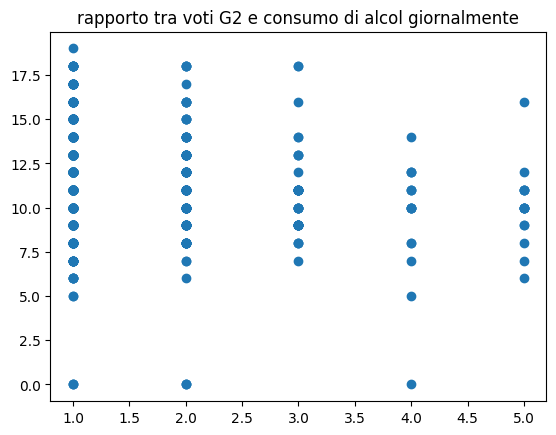

In [29]:
plt.scatter(dl['Dalc'],dl['G2'])
plt.title("rapporto tra voti G2 e consumo di alcol giornalmente")

E qui come il consumo di alcol giornalmente influenza i voti G3

Text(0.5, 1.0, 'rapporto tra voti G3 e consumo di alcol giornalmente')

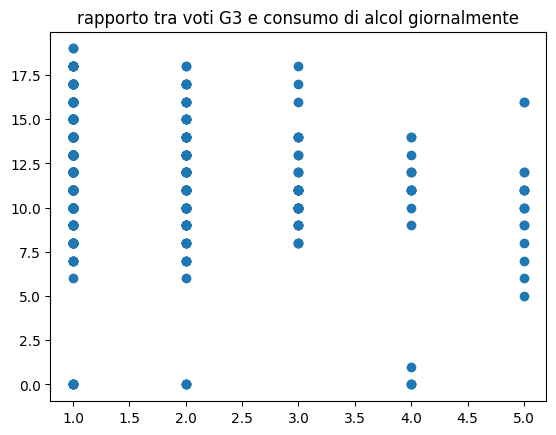

In [30]:
plt.scatter(dl['Dalc'],dl['G3'])
plt.title("rapporto tra voti G3 e consumo di alcol giornalmente")

Attraverso analizzo come il consumo di alcol giornalmente influenza i voti G3, e si può notare come con l'aumentare del consumo di alcol diminuiscano i voti

Text(0.5, 1.0, 'influenza del consumo di alcol giornalmente nei voti G3')

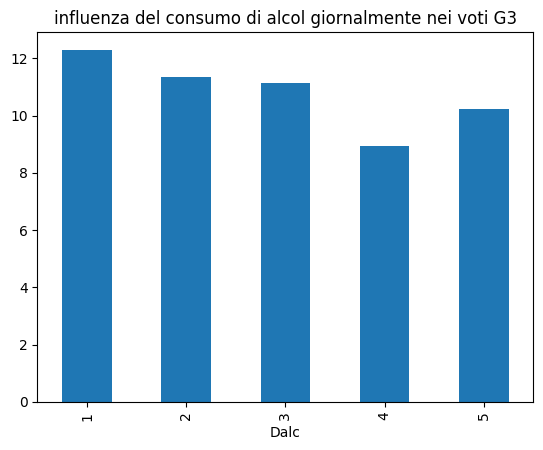

In [31]:
dl.groupby('Dalc')['G3'].mean().plot(kind='bar')
plt.title("influenza del consumo di alcol giornalmente nei voti G3")

Qui invece possiamo vedere come il consumo di alcol nel weekend influenzi i voti

Text(0.5, 1.0, 'influenza del consumo di alcol nel weekend nei voti G3')

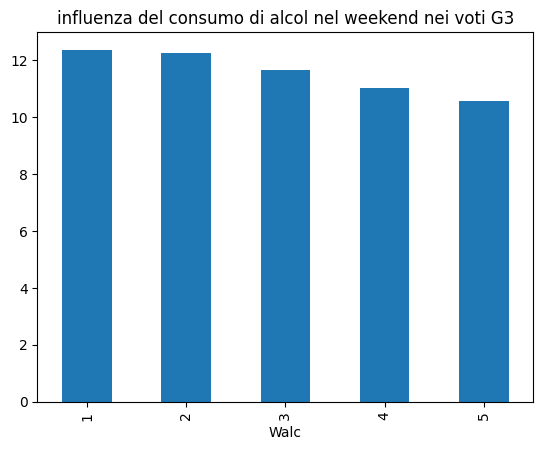

In [32]:
dl.groupby('Walc')['G3'].mean().plot(kind='bar')
plt.title("influenza del consumo di alcol nel weekend nei voti G3")

Anche attraverso questo grafico si può vedere come con l'aumentare del consumo di alcol giornalmente c'è una diminuzione dei voti G3

Text(0.5, 1.0, 'Influenza del consumo di alcol giornaliero nei voti G3')

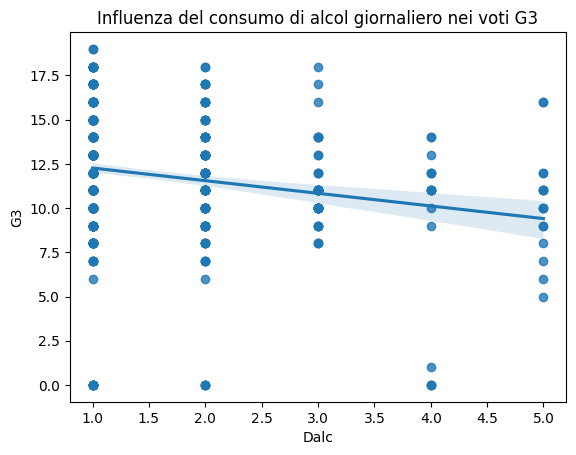

In [33]:
sns.regplot(x="Dalc",y="G3",data=dl)
plt.title("Influenza del consumo di alcol giornaliero nei voti G3")

Ed anche con qui si può notare come con l'aumentare del consumo di alcol nel weekend diminuiscano i voti

Text(0.5, 1.0, 'Influenza del consumo di alcol nel weekend nei voti G3')

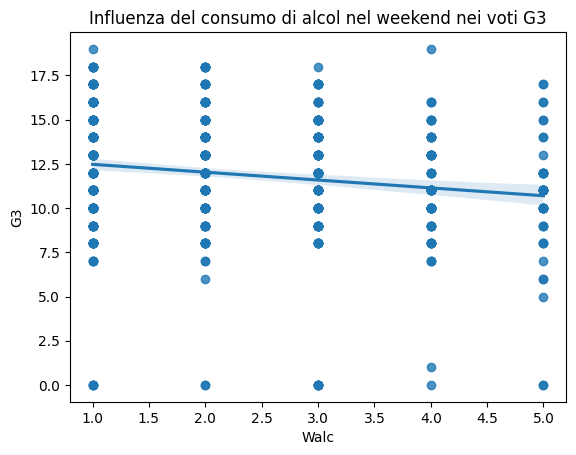

In [34]:
sns.regplot(x="Walc",y="G3",data=dl)
plt.title("Influenza del consumo di alcol nel weekend nei voti G3")

---

# 3. Cerco di prevedere il voto finale in base alla situazione personale e sociale

Il primo passaggio che faccio è un encoder su tutte la variabili di tipo object

In [35]:
nonnumeric_columns = [dl.columns[index] for index, dtype in enumerate(dl.dtypes) if dtype == 'object']
encoder = LabelEncoder()

for column in nonnumeric_columns:
    dl[column] = encoder.fit_transform(dl[column])

Successivamente divido il dataset in X e y, ed essendo solo interessato ai fattori personali e sociali, non prendo in considerazione alcune variabili 

In [36]:
X = dl.drop(["G1", "G2", "G3","failures", "absences"], axis=1)
y = dl["G3"]

Al fine di rendere le variabili più simili a loro applico un ridimensionamento

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

divido il dataset in train e test

In [38]:
seed = 172

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=seed)

A questo punto per i tre modelli che intendo utilizzare: SVR,RandomForest e DecisionTree, applico i seguenti passaggi:
1. Importo il modello
2. Scelgo una serie di iperparametri da validare
3. Per validarli e per effettuare la convalida incrociata utilizzo randomsearchcv, in cui prima gli passo il modello da utilizzare, poi gli iperparametri da utilizzare, divido in 5 fold, ed imposto la metrica da utilizzare. Utilizzo **Randomsearchcv** al posto di **Gridsearchcv** in quanto Gridsearchcv per ogni di valore di iperparametro addestra un modello e assegna un punteggio ai dati di test, Randomsearchcv imposta una griglia di valori di iperparametri e seleziona combinazioni casuali per adddestrare il modello e il punteggio. Quindi **Randomsearchcv** mi consente di testare un'ampia gamma di valori e di raggiungere una combinazione molto buona molto più velocemente di Gridsearchcv
4. Successivamente addestro il modello e visualizzo i migliori parametri ed il miglior score

In [40]:
svr = SVR()

In [42]:
param = [{"kernel": ["linear"],"C": [0.001,0.01, 0.1, 1,10,100, 1000], "epsilon": [0.0, 0.1, 0.01, 0.02]},
        {"kernel": ["rbf"], "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "gamma": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "epsilon": [0.0, 0.1, 0.01, 0.001]}]
clf = RandomizedSearchCV(svr, param,n_jobs = -1,cv=5,scoring='r2',random_state=seed)

In [43]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'epsilon': [0.0, 0.1, 0.01, 0.02],
                                         'kernel': ['linear']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'epsilon': [0.0, 0.1, 0.01, 0.001],
                                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                                         'kernel': ['rbf']}],
                   random_state=172, scoring='r2')

In [44]:
print(clf.best_params_)
clf.best_score_

{'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'C': 100}


0.22173041903630963

In [45]:
y_predclf = clf.predict(X_test)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predclf))
print('MSE:', metrics.mean_squared_error(y_test, y_predclf))
print('R square', metrics.r2_score(y_test, y_predclf))

MAE: 2.104083592816742
MSE: 8.722446626764949
R square 0.17187993895372622


In [47]:
rf = RandomForestRegressor(random_state=seed)
max_features = ['auto', 'sqrt']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5]
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,}
rf_best = RandomizedSearchCV(rf, param,n_jobs = -1,cv=5,scoring='r2',random_state=seed)

In [48]:
rf_best.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=172),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [0.1, 0.2, 0.3,
                                                              0.4, 0.5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=172, scoring='r2')

In [49]:
print(rf_best.best_params_)
rf_best.best_score_

{'n_estimators': 1400, 'min_samples_split': 0.1, 'max_features': 'sqrt'}


0.22968046430940475

In [50]:
yrf_pred = rf_best.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, yrf_pred))
print('MSE:', metrics.mean_squared_error(y_test, yrf_pred))
print('R square', metrics.r2_score(y_test, yrf_pred))

MAE: 2.0586491696130493
MSE: 8.54344223581923
R square 0.18887484112975694


In [52]:
dt = DecisionTreeRegressor(random_state=seed)
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split =[0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_leaf = [1, 2, 4, 10, 20, 40]
param = {"max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf}
dt_best = RandomizedSearchCV(dt, param,n_jobs = -1,cv=5,scoring='r2',random_state=seed)

In [53]:
dt_best.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=172),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             40],
                                        'min_samples_split': [0.2, 0.4, 0.6,
                                                              0.8, 1.0]},
                   random_state=172, scoring='r2')

In [54]:
print(dt_best.best_params_)
dt_best.best_score_

{'min_samples_split': 0.2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 110}


0.14028917205870448

In [55]:
y_preddt = dt_best.predict(X_test)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, y_preddt))
print('MSE:', metrics.mean_squared_error(y_test, y_preddt))
print('R square', metrics.r2_score(y_test, y_preddt))

MAE: 2.286364051583542
MSE: 9.842586865942318
R square 0.06553241480819982


Come metrica di valutazione ho deciso di usare: MAE,MSE,R square (che è quello che ho utilizzato come metrica in randomsearchcv), e per ciascun modello visualizzare i relativi valori

Text(0.5, 1.0, 'MAE')

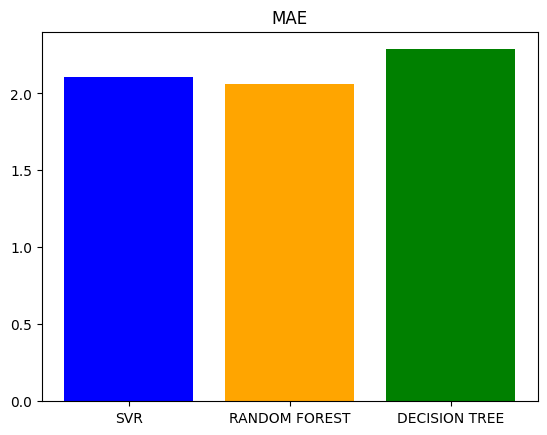

In [57]:
valori = metrics.mean_absolute_error(y_test, y_predclf), metrics.mean_absolute_error(y_test, yrf_pred), metrics.mean_absolute_error(y_test, y_preddt)
mod = "SVR","RANDOM FOREST","DECISION TREE"
color = "blue","orange","green"
plt.bar(mod,height=valori,color=color)
plt.title("MAE")

Text(0.5, 1.0, 'MSE')

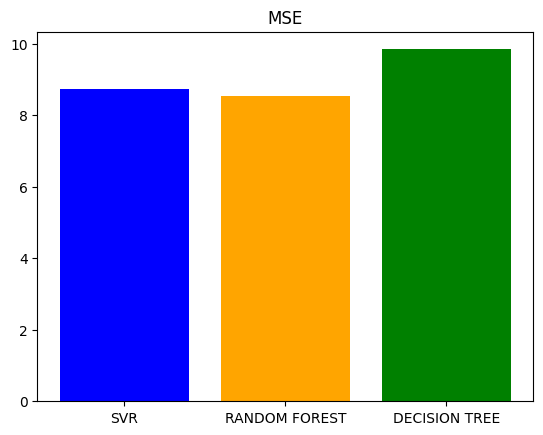

In [58]:
valori = metrics.mean_squared_error(y_test, y_predclf), metrics.mean_squared_error(y_test, yrf_pred), metrics.mean_squared_error(y_test, y_preddt)
mod = "SVR","RANDOM FOREST","DECISION TREE"
color = "blue","orange","green"
plt.bar(mod,height=valori,color=color)
plt.title("MSE")

Text(0.5, 1.0, 'R2')

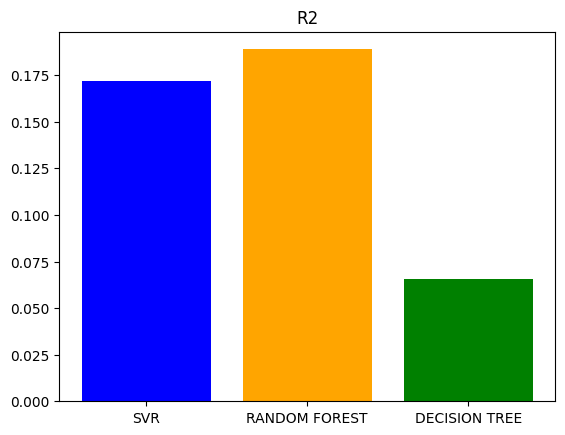

In [59]:
valori = metrics.r2_score(y_test, y_predclf), metrics.r2_score(y_test, yrf_pred), metrics.r2_score(y_test, y_preddt)
mod = "SVR","RANDOM FOREST","DECISION TREE"
color = "blue","orange","green"
plt.bar(mod,height=valori,color=color)
plt.title("R2")

---

**In quest'ultimo passaggio analizzo quali sono le feature che influenzano maggiormente i voti "G3"**

<BarContainer object of 28 artists>

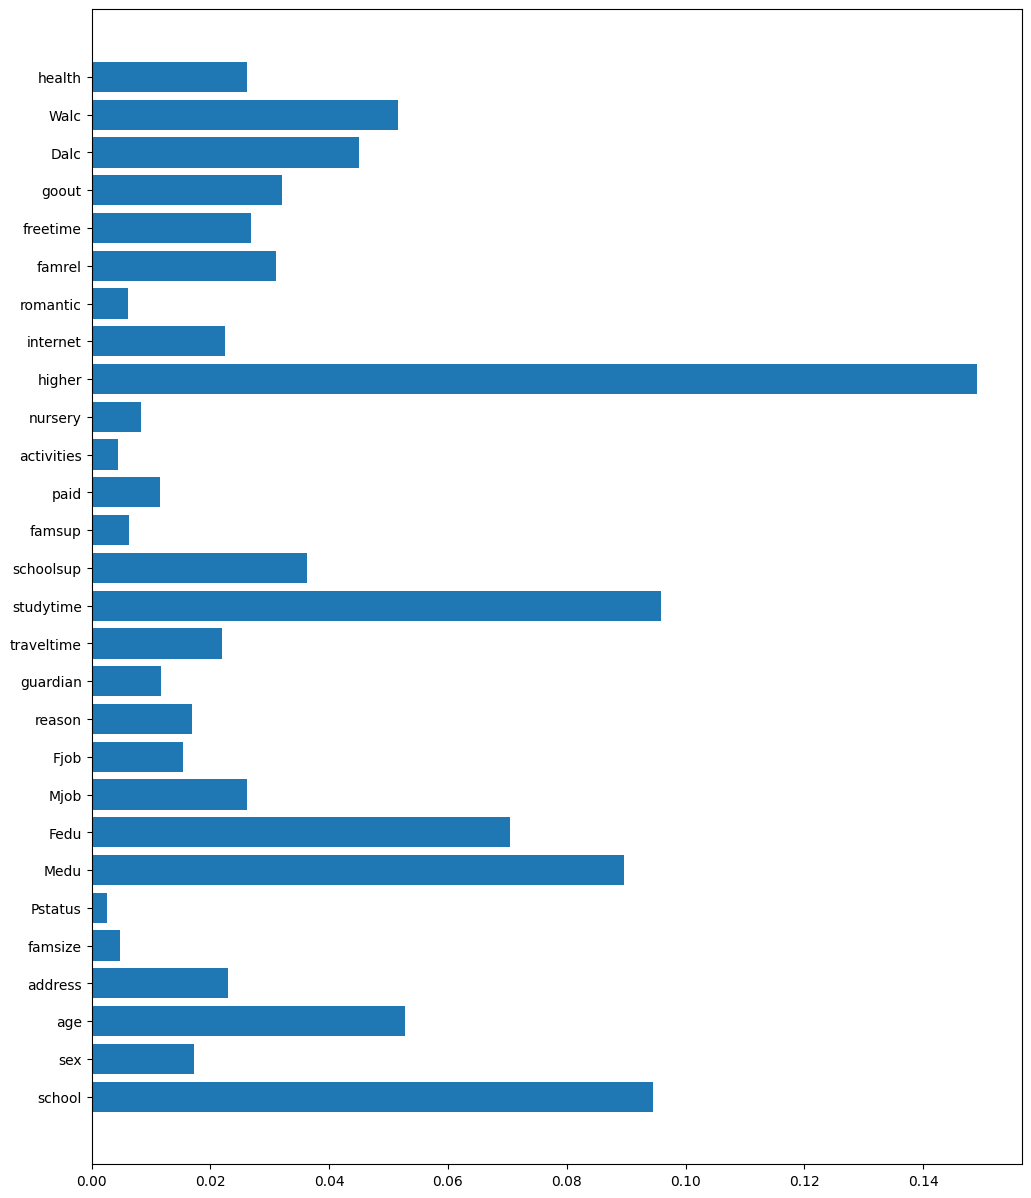

In [60]:
fig = plt.figure(figsize = (12,15))
plt.barh(X.columns, rf_best.best_estimator_.feature_importances_)

## Conclusioni finali
**Una volta finita l'analisi di tutte e tre le parti in cui ho diviso il progetto, possiamo notare alcune informazione importanti:**
- Riguardo la parte di visualizzazione delle variabili del dataset abbiamo notato come ci sia un numero di femmine più alto rispetto al numero di maschi, che c'è una distribuzione dell'età maggiore tra i 16 e i 18 anni, ci sono molti più studenti con i genitori conviventi rispetto ai genitori separati, i livelli di istruzione della madre e del padre e la distribuzione del consumo di alcol giornalmente e nel weekend
- Nella seconda parte abbiamo visto l'influenza dell'età nel voto finale, l'influenza dello stato di convivenza dei genitori nel voto finale, come con l'aumentare del tempo studiato aumentano anche i voti finali, e con l'aumento dei fallimenti diminuiscano i voti finali, come con l'aumentare del consumo di alcol giornalmente diminuiscano i voti finali, e di come con l'aumentare del consumo di alcol nel weekend diminuiscano i voti finali
- Nell'ultima parte abbiamo testato tre modelli al fine di prevedere quali variabili sociali e personali influivano maggiormente sul voto finale ed abbiamo visto le variabili che influenzano maggiormente i voti finali come ad esempio il tipo di scuola o il livello di istruzione della madre